# angular_cut():
#### take anguled cut of image data and sample the data at that angle
#### return a tuple or list of tuples (angle of cut, intensity data array, radii array)

In [109]:
%run -i _angular_cut.py
import _angular_cut

import numpy as np

from skbeam.core.utils import radial_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
%run -i find_ring_center.py
import find_ring_center

In [115]:
import importlib
importlib.reload(_angular_cut)

<module '_angular_cut' from '/home/mgullen/_angular_cut.py'>

In [27]:
x = np.linspace(-5,5,200)
X,Y = np.meshgrid(x,x)
Z = 100*np.cos(np.sqrt(x**2 + Y**2))**2 + 50
center = [(len(X) - 1)/2, (len(Y) - 1)/2 ] #(x,y)
print(center)
print(Z.shape)

[99.5, 99.5]
(200, 200)


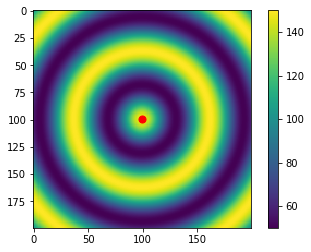

200

In [24]:
fig, ax = plt.subplots()
ax.scatter(center[0], center[1], s=50, c='red')
im = ax.imshow(Z,  cmap="viridis")
cbar = fig.colorbar(im)
plt.show()
len(Z)

In [25]:
q= radial_grid((center[0], center[1]),(len(X), len(Y)))
print(q[89, 100])
print(q.shape)

10.51189802081432
(200, 200)


### Take a cut at 25 degrees, sample the values underneath and return the array of values

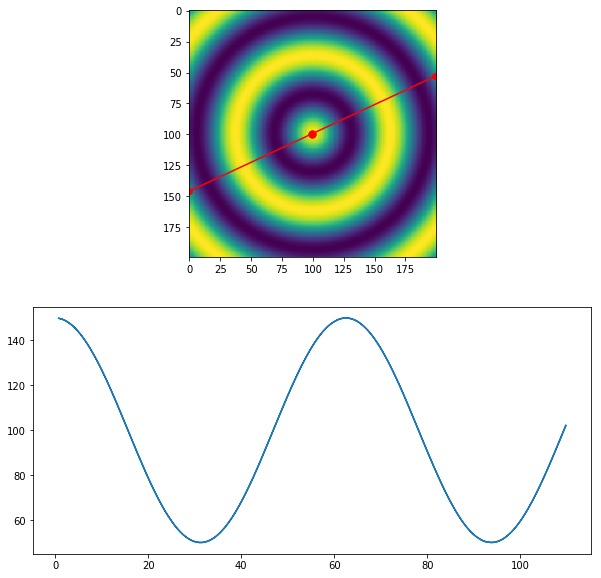

In [116]:
t1 = _angular_cut.angular_cut(image = Z, angle = 25, v_min = 50, v_max = 150, center_x = center[0], center_y = center[1])

### Take incremented cuts and return list of arrays of the values for each line

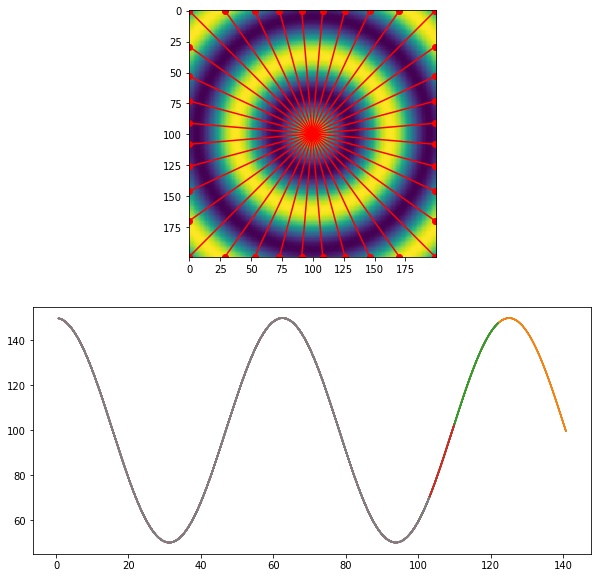

In [118]:
#return list of dict that contains radius angle and slice, or return a list of tuples
t2 = _angular_cut.angular_cut(image = Z, angle = 25, increment = 10, stop = 200, v_min = 50, v_max = 150, center_x = center[0], center_y = center[1])

In [119]:
x = np.linspace(-7,7,280)
y = np.linspace(-5,5,200)
X1,Y1 = np.meshgrid(x,y)
Z = 100*np.cos(np.sqrt(x**2 + Y1**2))**2 + 50
center1 = [(len(x) - 1)/2, (len(y) - 1)/2 ]
print(center1)

[139.5, 99.5]


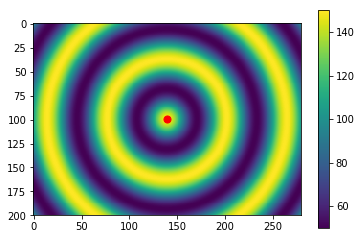

In [120]:
fig, ax = plt.subplots()
ax.scatter(center1[0], center1[1], s=50, c='red')
im = ax.imshow(Z,  cmap="viridis")
cbar = fig.colorbar(im)
plt.show()

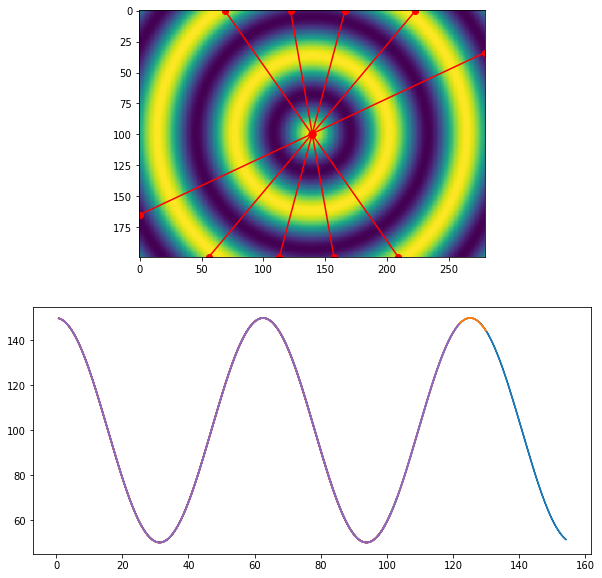

<class 'list'>


In [121]:
t3 = _angular_cut.angular_cut(image = Z, angle = 25, increment = 25, stop = 130, v_min = 50, v_max = 150, center_x = center1[0], center_y = center1[1])